In [1]:
import cvxopt
import matplotlib.pyplot as plt
import numpy as np
from   scipy import optimize
import sympy

%matplotlib inline
sympy.init_printing()

In [2]:
# Ex: h = 1/pi*r^2; f(r) = 2pi*r^2 + 2/r
r, h = sympy.symbols('r, h')
area = 2 * sympy.pi * r**2 + 2 * sympy.pi * r * h
volume = sympy.pi * r**2 * h
h_r = sympy.solve(volume - 1)[0]
area_r = area.subs(h_r)
rsol = sympy.solve(area_r.diff(r))[0]
rsol

In [3]:
_.evalf() # ???

In [4]:
# verify 2nd deriv is positive, and rsol = min
area_r.diff(r, 2).subs(r, rsol)

In [5]:
area_r.subs(r, rsol)

In [6]:
_.evalf()

In [7]:
def f(r):
    return 2*np.pi*r**2 + 2/r

In [8]:
r_min = optimize.brent(f, brack=(0.1, 4)) # brack: domain to check on
r_min

In [9]:
f(r_min)

In [10]:
# Alt:
optimize.minimize_scalar(f, bracket=(0.1, 4))

     fun: 5.535810445932086
    nfev: 19
     nit: 15
 success: True
       x: 0.5419260772557135

# Unconstrained Multivariate Optimization

In [2]:
x1, x2 = sympy.symbols('x_1, x_2')
f_sym = (x1 - 1)**4 + 5*(x2 - 1)**2 - 2*x1*x2
fprime_sym = [f_sym.diff(x_) for x_ in (x1, x2)]
sympy.Matrix(fprime_sym) # gradient

⎡                  3⎤
⎢-2⋅x₂ + 4⋅(x₁ - 1) ⎥
⎢                   ⎥
⎣-2⋅x₁ + 10⋅x₂ - 10 ⎦

In [3]:
fhess_sym = [[f_sym.diff(x1_, x2_) for x1_ in (x1, x2)] 
             for x2_ in (x1, x2)]
sympy.Matrix(fhess_sym) # Hessian

⎡           2    ⎤
⎢12⋅(x₁ - 1)   -2⎥
⎢                ⎥
⎣     -2       10⎦

In [4]:
f_lmbda = sympy.lambdify((x1, x2), f_sym, 'numpy')
fprime_lmbda = sympy.lambdify((x1, x2), fprime_sym, 'numpy')
fhess_lmbda = sympy.lambdify((x1, x2), fhess_sym, 'numpy')

In [5]:
def func_XY_to_X_Y(f):
    '''Wrapper for f(X) -> F(X[0], X[1])'''
    return lambda X: np.array(f(X[0], X[1]))

In [6]:
f = func_XY_to_X_Y(f_lmbda)
fprime = func_XY_to_X_Y(fprime_lmbda)
fhess = func_XY_to_X_Y(fhess_lmbda)

In [7]:
x_opt = optimize.fmin_ncg(f, (0, 0), fprime=fprime, fhess=fhess)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 17
         Hessian evaluations: 8


In [8]:
x_opt

array([1.88292613, 1.37658523])

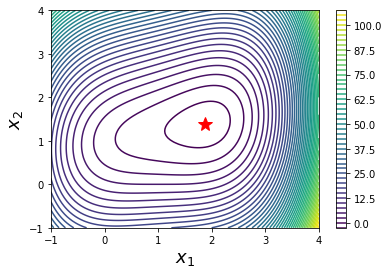

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, f_lmbda(X, Y), 50)

ax.plot(x_opt[0], x_opt[1], 'r*', markersize=15)
ax.set_xlabel(r'$x_1$', fontsize=18)
ax.set_ylabel(r'$x_2$', fontsize=18)
plt.colorbar(c, ax=ax);

In [10]:
x_opt = optimize.fmin_bfgs(f, (0, 0), fprime=fprime)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13


In [11]:
x_opt

array([1.88292645, 1.37658596])

In [12]:
x_opt = optimize.fmin_cg(f, (0, 0), fprime=fprime)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 18
         Gradient evaluations: 18


In [15]:
x_opt

array([1.88292612, 1.37658523])

In [16]:
x_opt = optimize.fmin_bfgs(f, (0, 0))

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 9
         Function evaluations: 52
         Gradient evaluations: 13


In [17]:
x_opt

array([1.88292644, 1.37658595])

In [18]:
def f(X):
    x, y = X
    return ((4*np.sin(np.pi*x) + 6*np.sin(np.pi*y)) 
            + (x - 1)**2 
            + (y - 1)**2)

In [19]:
x_start = optimize.brute(
    f, (slice(-3, 5, 0.5), slice(-3, 5, 0.5)), finish=None)
x_start

array([1.5, 1.5])

In [20]:
f(x_start)

In [21]:
x_opt = optimize.fmin_bfgs(f, x_start)

Optimization terminated successfully.
         Current function value: -9.520229
         Iterations: 4
         Function evaluations: 28
         Gradient evaluations: 7


In [22]:
x_opt

array([1.47586906, 1.48365787])

In [23]:
f(x_opt)

In [27]:
def func_X_Y_to_XY(f, X, Y):
    '''f(X, Y) -> f([X, Y])'''
    s = np.shape(X)
    return f(np.vstack([X.ravel(), Y.ravel()])).reshape(*s)

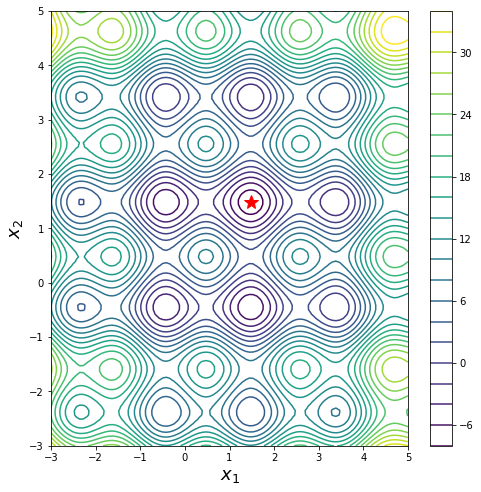

In [28]:
fig, ax = plt.subplots(figsize=(8, 8))
x_ = y_ = np.linspace(-3, 5, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 25)
ax.plot(x_opt[0], x_opt[1], 'r*', markersize=15)
ax.set_xlabel(r'$x_1$', fontsize=18)
ax.set_ylabel(r'$x_2$', fontsize=18)
plt.colorbar(c, ax=ax);

In [31]:
x_opt = optimize.fmin_bfgs(f, x_start)

Optimization terminated successfully.
         Current function value: -9.520229
         Iterations: 4
         Function evaluations: 28
         Gradient evaluations: 7


In [32]:
x_opt

array([1.47586906, 1.48365787])

In [30]:
# Alternately
res = optimize.minimize(f, x_start, method='BFGS')
x_opt = res.x
x_opt

array([1.47586906, 1.48365787])